<a href="https://colab.research.google.com/github/ArtyomHov/tensorflow-zero-to-mastery/blob/master/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few typs of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating a data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42
)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Our data is a little hard to understand right now... let's visualize it.

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


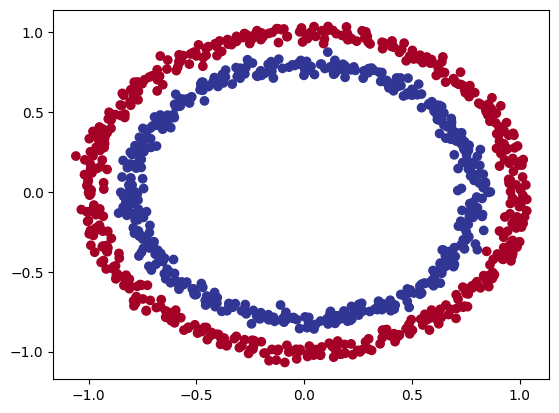

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with Tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [10]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 6.2328 - accuracy: 0.4870
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 6.1297 - accuracy: 0.4910
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.9587 - accuracy: 0.4930
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 5.7769 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 6.6838 - accuracy: 0.5040


In [11]:
# Let's try and improve our model training longer
model_1.fit(X, y, epochs = 200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

#### Since we are working on a binary classification problem and our model is getting around 50% percent accuracy... it's performing as it's gueassing.

So let's step thinga up a notch and add an extra layer

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs = 100, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932680010795593, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might add more layers or increase hidden units within a layer
2. Compiling the model - here we might to choose a different optimization function such as Adam instead of SGD
3. Fitting the model - perhaps we might fit our model for more epochs (leave it training for longer).

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time with 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5010


[0.697898805141449, 0.5009999871253967]

In [16]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


To visualize our model predictions let's create a function `plot_decision_boundary()`, this function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as line between zones (where each unique class falls).

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots decision bundary created by a model predicting on X.
  """
  # Define the axes bundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - -0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max),
                       np.linspace(y_min, y_max))

  # Create X values (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classificarion")
    # We have to reshape our prediction to get ready them for plotting
    y_pred =  np.argmax(y_pred, axis = 1).rehape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

79/79 [==============================] - 0s 2ms/step
doing binary classification


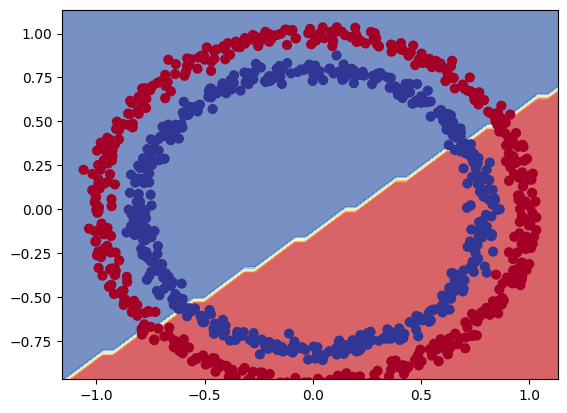

In [18]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [20]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(1, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compiled our model for a binary classification problem.

But we are now working on a regression problem. Let's change the model to suit our data.

In [22]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 10ms/step - loss: 385.5500 - mae: 385.5500
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 280.5334 - mae: 280.5334
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 178.8309 - mae: 178.8309
Epoch 4/100
5/5 [==============================] - 0s 18ms/step - loss: 73.4028 - mae: 73.4028
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 62.1583 - mae: 62.1583
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 83.4516 - mae: 83.4516
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 61.8521 - mae: 61.8521
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 42.8524 - mae: 42.8524
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 47.9157 - mae: 47.9157
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 40.9909 - mae: 40.9909
Epoch 11/100
5/5 [==============================

2/2 [==============================] - 0s 6ms/step


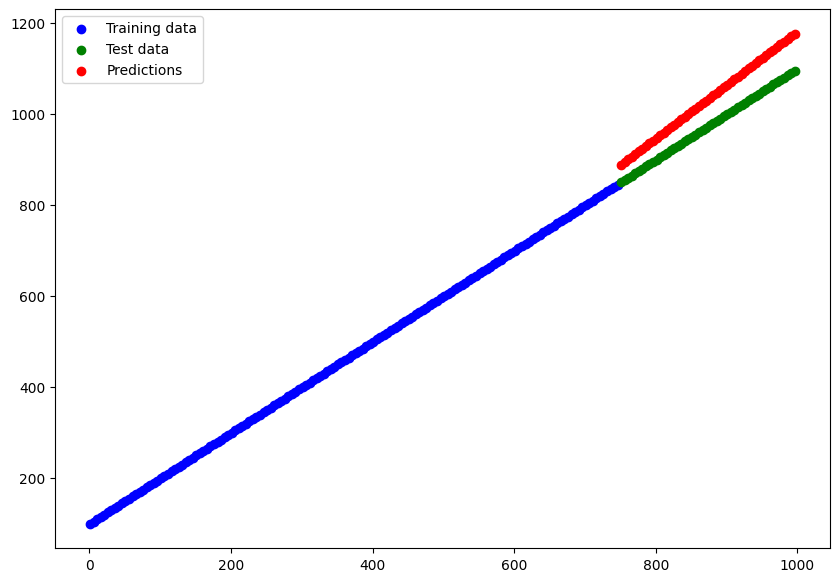

In [23]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the models predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label = 'Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label = 'Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label = 'Predictions')
plt.legend()

## The missing pace: Non-linearity

In [24]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3216 - accuracy: 0.4410
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4440
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1728 - accuracy: 0.4490
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1415 - accuracy: 0.4520
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1109 - accuracy: 0.4510
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0397 - accuracy: 0.4490
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0133 - accuracy: 0.4550
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9743 - accuracy: 0.4570
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8473 - accuracy: 0.4580
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6876 - accuracy: 0.4600
Epoch 11/

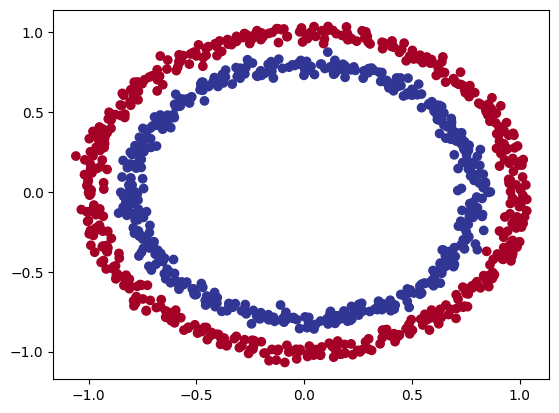

In [25]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


79/79 [==============================] - 0s 1ms/step
doing binary classification


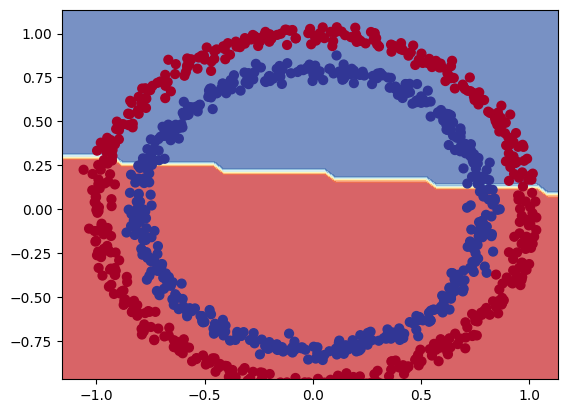

In [26]:
# Check the desicion boundary for our latest model
plot_decision_boundary(model = model_4, X=X, y=y)


### Let's try to build our first model with non-linear activation function

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7308 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6846 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6678 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6617 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6474 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6243 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5838 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5776 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5469 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5402 - accuracy: 0.4770
Epoch 11/

In [28]:
# Time to replicate the multilayer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 1.9559 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 1.1492 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0285 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9484 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8909 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8520 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8269 - accuracy: 0.4110
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8087 - accuracy: 0.3080
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7944 - accuracy: 0.4010
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7781 - accuracy: 0.4040
Epoch 11/

In [29]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9800


[0.07282476127147675, 0.9800000190734863]

79/79 [==============================] - 0s 1ms/step
doing binary classification


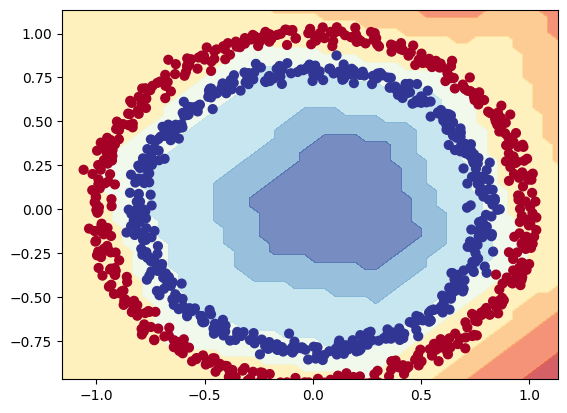

In [30]:
# How do our model predictions look
plot_decision_boundary(model_6, X, y)

In [31]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6941 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4960
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4960
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4640
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4910
Epoch 11/

In [32]:
# 4. Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8730


[0.38823944330215454, 0.8730000257492065]

79/79 [==============================] - 0s 1ms/step
doing binary classification


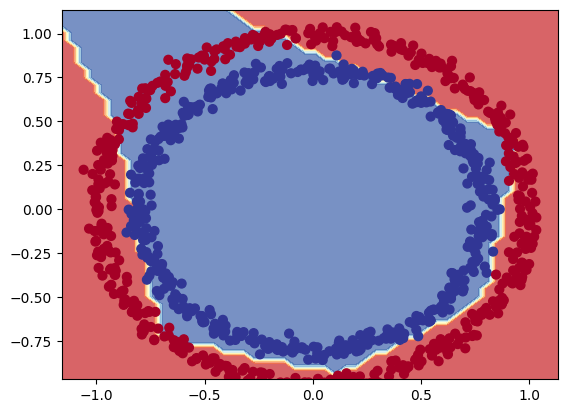

In [33]:
# Let's visualize our metrics
plot_decision_boundary(model_7, X, y)

In [34]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

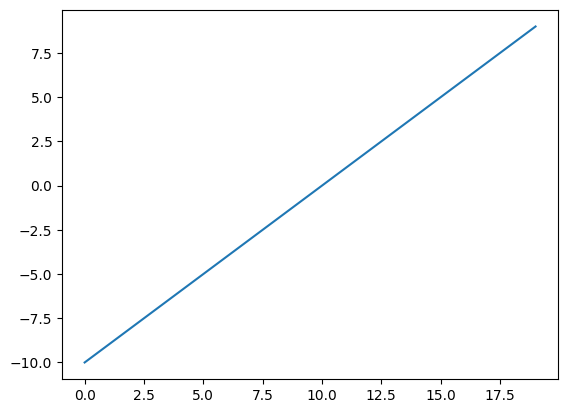

In [35]:
# Visualize our toy tensor
plt.plot(A)

In [36]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

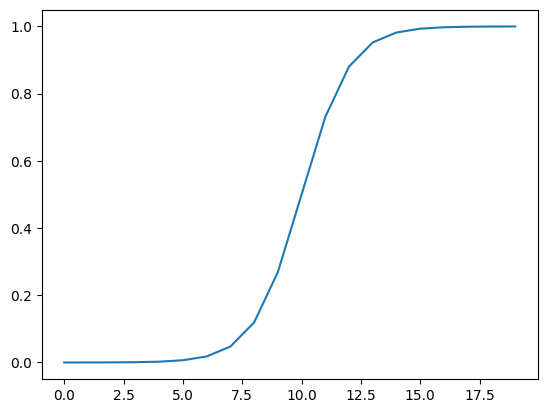

In [37]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [38]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

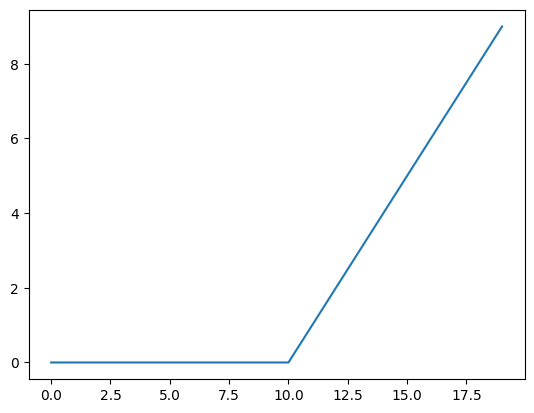

In [39]:
# Plot relu modified tensor
plt.plot(relu(A))

In [40]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

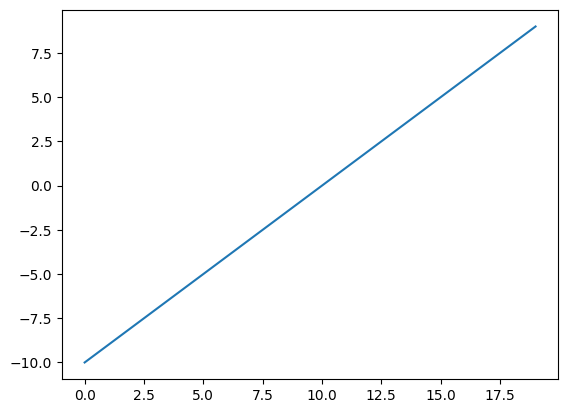

In [41]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))


In [42]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far, we've been training and testing on the same dataset.

However, in machine learning this is basically a sin.

So, let's create a training and test set.

In [43]:
# Check how many examples we have
len(X)

1000

In [44]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [45]:
# Let's create a model to fit on the training data and evaluate on the testing data

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.4863
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5025
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5300
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5500
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5700
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.7050
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.7337
Epoch 8/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6362 - accuracy: 0.7250
Epoch 9/25
25/25 [==============================] - 0s 11ms/step - loss: 0.6068 - accuracy: 0.7538
Epoch 10/25
25/25 [==============================] - 0s 10ms/step - loss: 0.5745 - accuracy: 0.7563
Epoch 11/25
25/25

In [46]:
# Evaluate the model on test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1249 - accuracy: 0.9800


[0.1248721107840538, 0.9800000190734863]

79/79 [==============================] - 0s 1ms/step
doing binary classification
79/79 [==============================] - 0s 1ms/step
doing binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

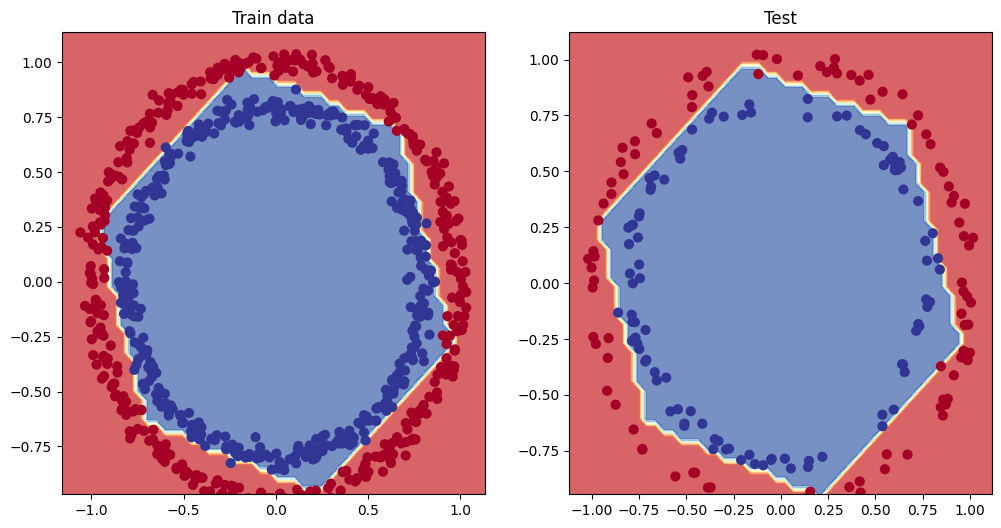

In [47]:
# Plot the decision boundaries for training and test datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train data')
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model=model_8, X=X_test, y=y_test)
plt.show

## Plot the loss (or training) curves

In [48]:
 # Convert the history object into a DataFrame
 pd.DataFrame(history.history)

,loss,accuracy
0,0.694144,0.48625
1,0.692854,0.50250
2,0.691777,0.53000
3,0.689807,0.55000
4,0.687441,0.57000
5,0.673889,0.70500
6,0.658703,0.73375
7,0.636221,0.72500
8,0.606800,0.75375
9,0.574506,0.75625


Text(0.5, 1.0, 'Model_8 loss curves')

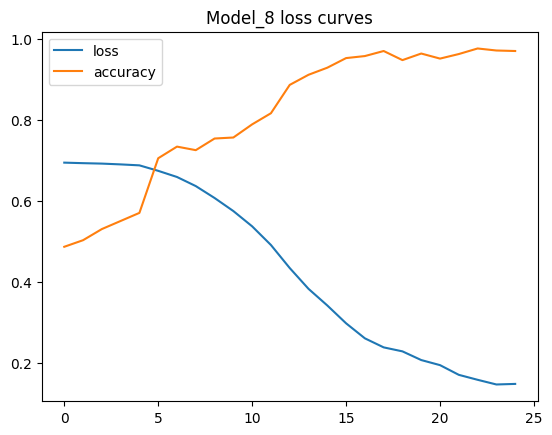

In [49]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

**Note** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we are going to use the following steps:
* A learning rate  **callback** - you can think of callback as an extra piece of functionality you can add to your model while training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [51]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.7302 - accuracy: 0.5113 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7290 - accuracy: 0.5125 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7276 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7262 - accuracy: 0.5100 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7247 - accuracy: 0.5075 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7231 - accuracy: 0.5038 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7213 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7197 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

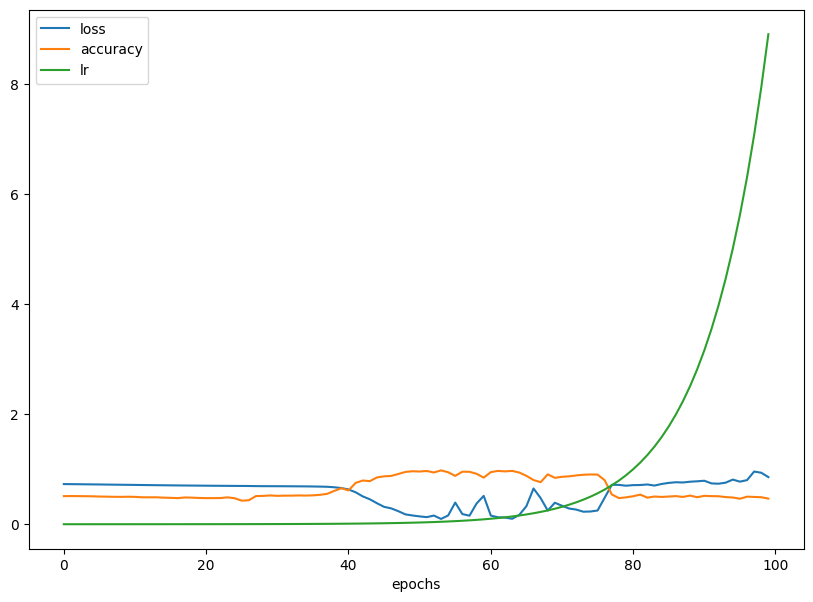

In [52]:
# heckout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs loss')

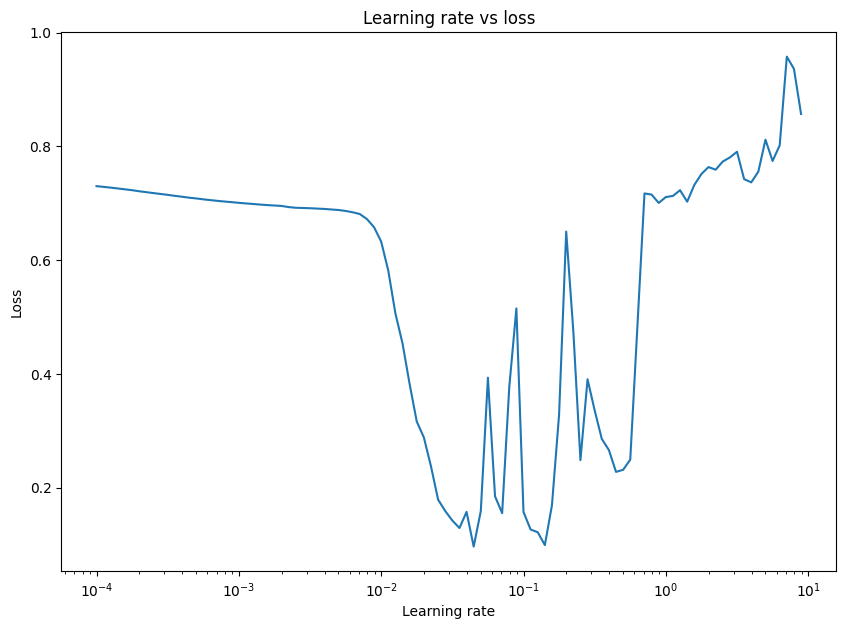

In [57]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10**(tf.range(100) /  20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs loss')

In [58]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [61]:
# Let's try using a higher **ideal** learning rate with the same model as before

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model with the ideal lerning rate
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

# 3. Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 6ms/step - loss: 0.6961 - accuracy: 0.4875
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6856 - accuracy: 0.5350
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6728 - accuracy: 0.5575
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6454 - accuracy: 0.6662
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5991 - accuracy: 0.7300
Epoch 6/20
25/25 [==============================] - 0s 13ms/step - loss: 0.5235 - accuracy: 0.8562
Epoch 7/20
25/25 [==============================] - 0s 9ms/step - loss: 0.4157 - accuracy: 0.9425
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 0.2982 - accuracy: 0.9600
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 0.2299 - accuracy: 0.9775
Epoch 10/20
25/25 [==============================] - 0s 11ms/step - loss: 0.1736 - accuracy: 0.9925
Epoch 11/20
25/25

In [62]:
# evaluate model 10 on test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9900


[0.047256968915462494, 0.9900000095367432]

In [63]:
# Evaluate model 8 on test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1249 - accuracy: 0.9800


[0.1248721107840538, 0.9800000190734863]

79/79 [==============================] - 0s 2ms/step
doing binary classification
79/79 [==============================] - 0s 2ms/step
doing binary classification


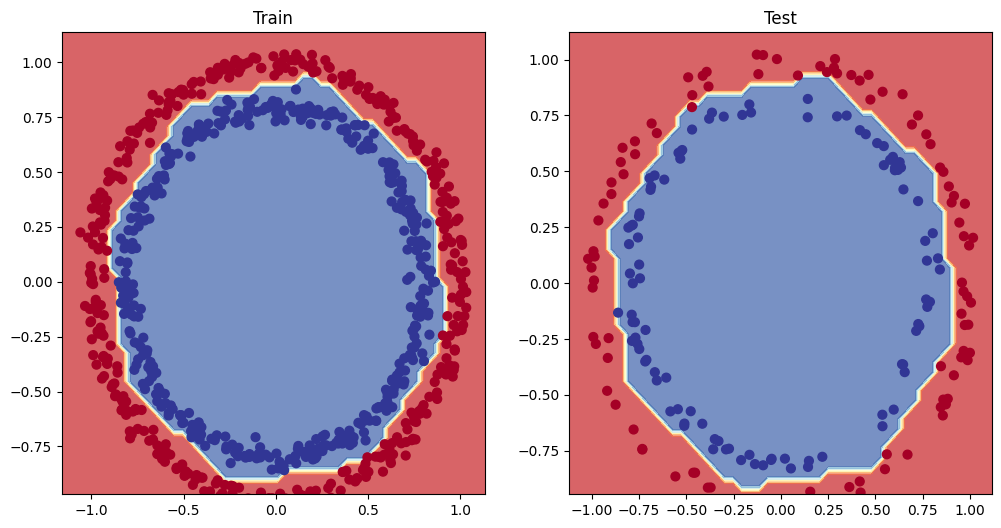

In [64]:
# Plot the decision boudaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model=model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model=model_10, X=X_test, y=y_test)